In [1]:
import seaborn as sn
from statsmodels.api import formula as sm

def standardize(x):
    '''Use on a pd.series'''
    
    mn = np.nanmean(x)
    sd = np.nanstd(x)
    
    x2 = (x-mn)/sd
    
    return x2

sn.set_style('white')

### Load Vcm

In [2]:
Vcm = pd.read_pickle('../jemez/data/Vcm_cosmos_pillow_swe.pcl') # load SWE
Vcm['datetime'] = Vcm.index
#jemez_raws_lapse.pcl
tmp = pd.read_pickle('../jemez/data/Vcm_hybrid_precip.pcl') # load P
tmp['datetime'] = tmp.index
tmp = tmp[['hybrid_p','datetime']]

Vcm = pd.merge(Vcm,tmp,on='datetime')

tmp = pd.read_pickle('../jemez/data/VCM_2.pcl') # load ET
tmp['datetime'] = tmp.index
del tmp['P']

Vcm = pd.merge(Vcm,tmp,on='datetime')

#tmp = pd.read_pickle('../jemez/data/lower_lajara_specific_discharge.pcl')
#tmp['datetime'] = tmp.index
#Vcm = pd.merge(Vcm,tmp,on='datetime')

Vcm.index = pd.DatetimeIndex(Vcm.datetime)
del Vcm['datetime']
Vcm_stats = pd.read_pickle('../jemez/data/vcm_swe_stats.pcl')

Vcm['wateryear'] = Vcm.index.map(rut.wateryear)
Vcm.columns = [['swe','P','ET','Tave','Tmax','Tmin','wateryear']]

In [3]:
Vcm_summary = Vcm.groupby(by='wateryear').sum()[['ET','P']]
Vcm_summary['wateryear'] = Vcm_summary.index

Vcm = pd.merge(Vcm_summary,Vcm_stats, on='wateryear')

Vcm['ET_P'] = Vcm.ET/Vcm.P
Vcm['RR_ET'] = 1-Vcm.ET_P

In [4]:
Vcm['SMR2'] = standardize(Vcm.SMR)
Vcm['RR_ET2'] = standardize(Vcm.RR_ET)
Vcm['DOWYpeakSWE2'] = standardize(Vcm.dowy_peakswe)
Vcm['peakSWE2'] = standardize(Vcm.peakswe)

In [5]:
Vcm.wateryear

0    2010
1    2011
2    2012
3    2013
Name: wateryear, dtype: int64

### Load P301

In [6]:
P301 = pd.read_pickle('../../greenness_timing/data/p301/new_providence.pcl')
P301['wateryear'] = P301.datetime.map(rut.wateryear)

tmp = pd.read_pickle('../../../greenness_timing/ameriflux/CA_p301/P301.pcl')
tmp = tmp.resample('D').apply(np.nansum)
tmp['datetime'] = tmp.index
tmp = tmp[['tot_ET','datetime']].copy()
tmp.columns=['ET','datetime']

P301 = pd.merge(P301,tmp,on='datetime', how = 'inner')
P301.index = pd.DatetimeIndex(P301.datetime)

In [7]:
P301_stats = pd.read_pickle('../providence/data/swe_stats.pcl')

In [8]:
P301 = P301[['SWE','Q','P_upper','wateryear','ET']]

In [9]:
P301.columns = ['SWE','discharge','precip','wateryear','ET']

In [10]:
P301_summary = P301.groupby(by='wateryear').sum()[['ET','precip','discharge']]
P301_summary.columns = [['ET','P','Q']]
P301_summary['wateryear'] = P301_summary.index
P301 = pd.merge(P301_summary,P301_stats, on='wateryear')

In [11]:
P301['SMR'] = P301.peakswe/(P301.dowy_snowfree-P301.dowy_peakswe)
P301['ET_P'] = P301.ET/P301.P
P301['RR_ET'] = 1. - P301.ET_P

In [12]:
P301['SMR2'] = standardize(P301.SMR)
P301['RR_ET2'] = standardize(P301.RR_ET)
P301['DOWYpeakSWE2'] = standardize(P301.dowy_peakswe)
P301['peakSWE2'] = standardize(P301.peakswe)

In [13]:
P301.wateryear

0    2011
1    2012
2    2013
3    2014
4    2015
Name: wateryear, dtype: int64

### Load Nr1

In [14]:
Nr = pd.read_pickle('../data/crn_corr.pcl')
keys = ['Tmax', 'Tmin','P','coef', 'snow', 'rain', 'wateryear']
Nr = Nr[keys].copy()
Nr['datetime'] = Nr.index

tmp = pd.read_pickle('../../greenness_timing/data/AFX2_new.pcl')
tmp['datetime'] = tmp.index
tmp = tmp[['ET','datetime']].copy()

Nr = pd.merge(Nr,tmp,on='datetime', how='inner')

#tmp = pd.read_pickle('/RHESSys/Comocreek/barnhatb/obs/como_specific_discharge_daily.pcl')
#tmp['datetime'] = tmp.index
#tmp = tmp[['discharge','datetime']]
#Nr = pd.merge(Nr,tmp,on='datetime', how='inner')

Nr.index = pd.DatetimeIndex(Nr.datetime)
Nrtmp = Nr.copy()
del Nr['datetime']
Nr_stats = pd.read_pickle('../data/niwot_stats.pcl')
Nr_stats['wateryear'] = Nr_stats.index
del Nr_stats['P']

In [15]:
Nr_summary = Nr.groupby(by='wateryear').sum()[['ET','P']]
Nr_summary.columns = ['ET','P']
Nr_summary['wateryear'] = Nr_summary.index
Nr = pd.merge(Nr_summary,Nr_stats, on='wateryear')

In [16]:
Nr['SMR'] = Nr.peakSWE/(Nr.DOWYnoSnow-Nr.DOWYpeakSWE)
Nr['ET_P'] = Nr.ET/Nr.P
Nr['RR_ET'] = 1. - Nr.ET_P

In [17]:
Nr['SMR'] = pd.to_numeric(Nr.SMR)
Nr['peakSWE'] = pd.to_numeric(Nr.peakSWE)

Nr['SMR'] *= 1000. # m > mm

In [18]:
Nr['SMR2'] = standardize(Nr.SMR)
Nr['RR_ET2'] = standardize(Nr.RR_ET)
Nr['DOWYpeakSWE2'] = standardize(Nr.DOWYpeakSWE)
Nr['peakSWE2'] = standardize(Nr.peakSWE)

In [19]:
Nr['P_ET'] = Nr.P - Nr.ET

In [24]:
Nr.wateryear

0     2004
1     2005
2     2006
3     2007
4     2008
5     2009
6     2010
7     2011
8     2012
9     2013
10    2014
Name: wateryear, dtype: int64

In [20]:
tmp = pd.read_pickle('/RHESSys/Comocreek/barnhatb/obs/como_specific_discharge_daily.pcl')

In [21]:
tmp['wateryear'] = tmp.index.map(rut.wateryear)

In [22]:
tmp['datetime'] = tmp.index
Nrtmp['datetime'] = Nrtmp.index

In [23]:
Nrtmp2 = pd.merge(Nrtmp,tmp,on='datetime',how='inner')

In [268]:
Nrtmp2.index = pd.DatetimeIndex(Nrtmp2.datetime)

In [269]:
Nrtmp2 = Nrtmp2.resample('6M').sum()[['ET','P','discharge']]

In [270]:
Nrtmp2['P_ET'] = Nrtmp2.P-Nrtmp2.ET

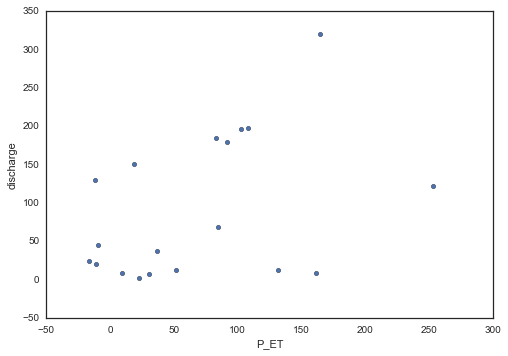

In [271]:
Nrtmp2.plot.scatter('P_ET','discharge')

In [95]:
tmp = tmp.groupby(by='wateryear').sum()

In [129]:
t = list(tmp.discharge.as_matrix())

In [131]:
t.append(np.NaN)

In [133]:
Nr['q'] = t

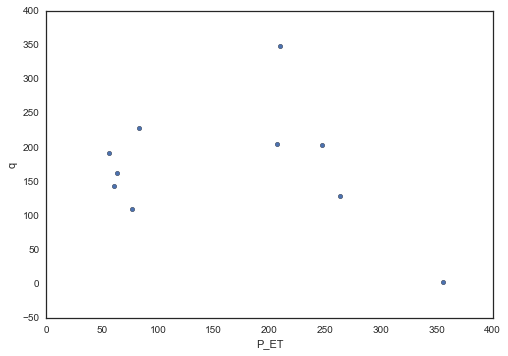

In [136]:
Nr.plot.scatter('P_ET','q')

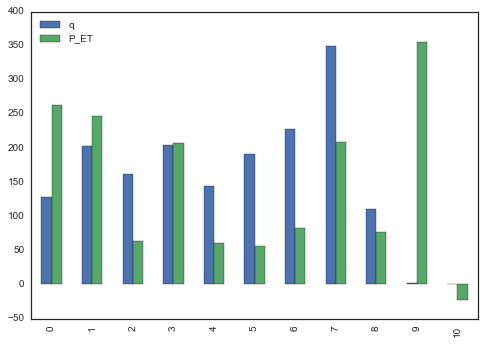

In [138]:
Nr[['q','P_ET']].plot.bar()

In [135]:
P301.describe()['RR_ET'].round(2)

count    5.00
mean     0.54
std      0.16
min      0.38
25%      0.40
50%      0.56
75%      0.57
max      0.78
Name: RR_ET, dtype: float64

In [62]:
Nr.describe()['RR_ET'].round(2)

count    11.00
mean      0.16
std       0.16
min      -0.20
25%       0.09
50%       0.13
75%       0.28
max       0.37
Name: RR_ET, dtype: float64

In [64]:
Vcm.describe()['RR_ET'].round(2)

count    4.00
mean     0.14
std      0.21
min     -0.08
25%     -0.02
50%      0.14
75%      0.30
max      0.35
Name: RR_ET, dtype: float64

In [19]:
df = Vcm

df.loc[df.SMR == df.SMR.max(),['SMR2','peakSWE2','DOWYpeakSWE2','wateryear']]

,SMR2,peakSWE2,DOWYpeakSWE2,wateryear
0,1.727149,1.692442,1.72959,2010


In [20]:
mod = sm.ols('RR_ET2 ~ SMR2 + DOWYpeakSWE2 + + 1', Nr).fit()

In [21]:
mod.f_pvalue

0.18938661061935941

In [22]:
df = pd.DataFrame({'variable':['SMR','TpeakSWE'],'varid':[1,2],'value':[mod.params['SMR2'],mod.params['DOWYpeakSWE2']],'Site':['Nr1','Nr1']})

In [23]:
df

,Site,value,variable,varid
0,Nr1,0.465677,SMR,1
1,Nr1,0.123666,TpeakSWE,2


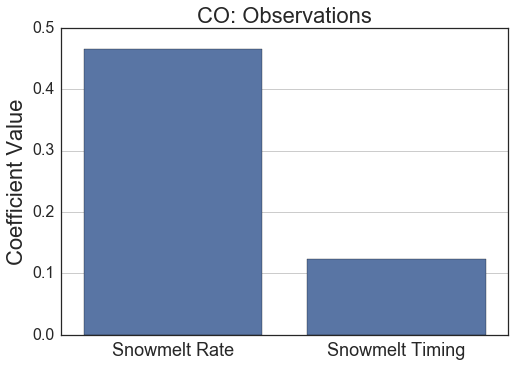

In [25]:
p = sn.barplot(x='varid',y='value',data=df,hue='Site')
p.set_xticklabels(['Snowmelt Rate','Snowmelt Timing'],fontsize=18)
p.set_xlabel('')
p.set_ylabel('Coefficient Value', fontsize = 22)
p.legend_.remove()
p.grid(which='major',axis='y')
[tick.label.set_fontsize(16) for tick in p.yaxis.get_major_ticks()];
plt.title('CO: Observations', fontsize=22)
#plt.savefig('./figures/Nr1_coefficients.png',dpi=300,bbox_inches='tight')

In [26]:
P301.head()

,ET,P,Q,wateryear,doaccum,dosnowfree,dopeakswe,peakswe,dowy_accum,dowy_snowfree,dowy_peakswe,SMR,ET_P,RR_ET,SMR2,RR_ET2,DOWYpeakSWE2,peakSWE2
0,511.758951,2283.116,12415.588500,2011,2010-10-01,2011-06-05,2011-03-27,1.135233,0,247,177,0.016218,0.224149,0.775851,1.650482,1.669231,0.801121,1.979222
1,440.876412,1018.262,2043.794540,2012,2011-10-01,2012-04-23,2012-03-19,0.194150,0,205,170,0.005547,0.432970,0.567030,-0.362058,0.204238,0.636184,-0.347873
2,382.936356,879.220,1214.501885,2013,2012-10-01,2013-03-23,2013-01-16,0.204788,0,173,107,0.003103,0.435541,0.564459,-0.823074,0.186197,-0.848245,-0.321569
3,401.848572,646.378,312.100286,2014,2013-10-01,2014-04-08,2014-04-02,0.063623,0,189,183,0.010604,0.621693,0.378307,0.591673,-1.119765,0.942495,-0.670638
4,332.803778,558.344,251.900000,2015,2014-10-01,2015-01-28,2014-12-18,0.076360,0,119,78,0.001862,0.596055,0.403945,-1.057022,-0.939901,-1.531554,-0.639141


In [27]:
#df = Nr[['SMR','DOWYpeakSWE','peakSWE','RR_ET']]
#df = Vcm[['SMR','dowy_peakswe','peakswe','RR_ET']]
df = P301[['SMR','dowy_peakswe','peakswe','RR_ET']]

In [28]:
df = pd.melt(df,id_vars='RR_ET')

In [29]:
current_palette = sn.color_palette()

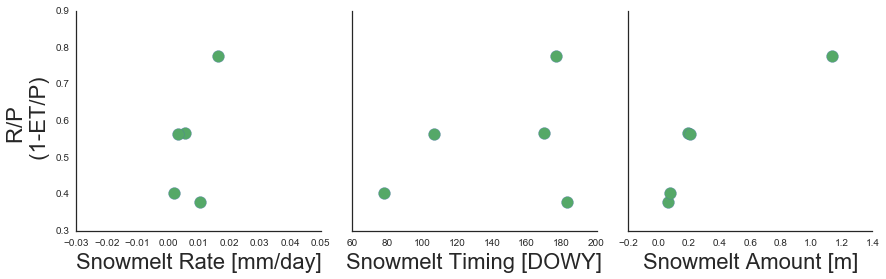

In [30]:
#plt.figure(figsize=(5,12))
axfont = 22
tickfont = 18

xlabels = ['Snowmelt Rate [mm/day]','Snowmelt Timing [DOWY]','Snowmelt Amount [m]']

grid = sn.FacetGrid(df,col='variable',sharex=False,size=4)
grid.map(plt.scatter,'value','RR_ET',s=140,c=current_palette[1])
axes = plt.gcf().axes

ax = axes[1]
#ax.set_xticks([160,180,200,220,240])

for ax,xlab in zip(axes,xlabels):
    ax.set_ylabel('', fontsize = axfont)
    ax.set_title('')
    ax.set_xlabel(xlab,fontsize=axfont)
    #[tick.label.set_fontsize(tickfont) for tick in ax.yaxis.get_major_ticks()];
    #[tick.label.set_fontsize(tickfont) for tick in ax.xaxis.get_major_ticks()];

ax = axes[0]
ax.set_ylabel('R/P \n (1-ET/P)', fontsize = axfont)

#plt.savefig('./figures/P301_obs.png',dpi=300,bbox_inches='tight')

In [31]:
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                 RR_ET2   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     2.063
Date:                Thu, 15 Jun 2017   Prob (F-statistic):              0.189
Time:                        16:46:44   Log-Likelihood:                -13.320
No. Observations:                  11   AIC:                             32.64
Df Residuals:                       8   BIC:                             33.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept    -8.327e-17      0.287   -2.9e-16   

/Users/barnhatb/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


### Generate Summaries:

<Container object of 11 artists>

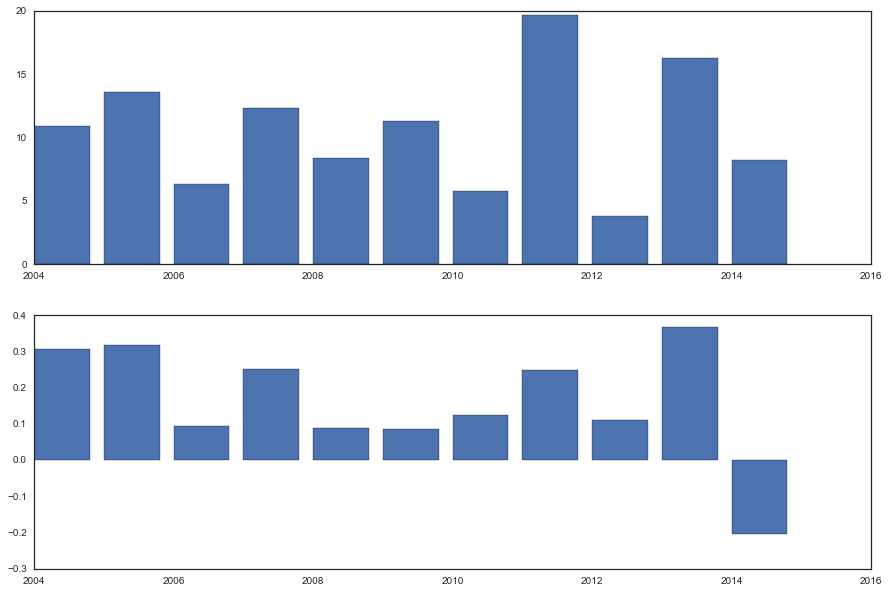

In [33]:
fig = plt.figure(figsize=(15,10))
fig.add_subplot(211)
plt.bar(Nr.wateryear,Nr.SMR)
fig.add_subplot(212)
plt.bar(Nr.wateryear,Nr.RR_ET)

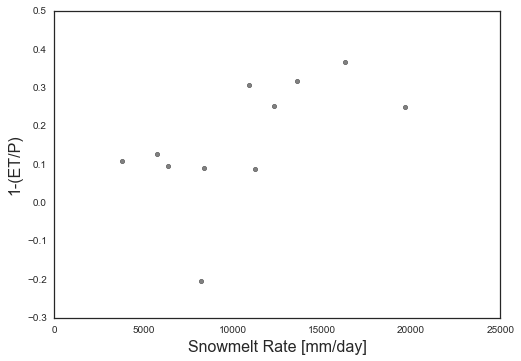

In [34]:
plt.scatter(Nr.SMR*1000.,Nr.RR_ET,s=20,c='0.5')
plt.xlabel('Snowmelt Rate [mm/day]', fontsize = 16)
plt.ylabel('1-(ET/P)', fontsize=16)

In [56]:
P301.describe()[['dowy_peakswe','SMR']]

,dowy_peakswe,SMR
count,5.000000,5.000000
mean,143.000000,0.007467
std,47.449974,0.005928
min,78.000000,0.001862
25%,107.000000,0.003103
50%,170.000000,0.005547
75%,177.000000,0.010604
max,183.000000,0.016218


## Combine the data frames

In [35]:
Nr2 = Nr.copy()

In [36]:
Nr2['site'] = 'Nr1'

In [37]:
P3012 = P301.copy()
P3012['site'] = 'P301'

In [39]:
P3012

,ET,P,Q,wateryear,doaccum,dosnowfree,dopeakswe,peakswe,dowy_accum,dowy_snowfree,dowy_peakswe,SMR,ET_P,RR_ET,SMR2,RR_ET2,DOWYpeakSWE2,peakSWE2,site
0,511.758951,2283.116,12415.588500,2011,2010-10-01,2011-06-05,2011-03-27,1.135233,0,247,177,0.016218,0.224149,0.775851,1.650482,1.669231,0.801121,1.979222,P301
1,440.876412,1018.262,2043.794540,2012,2011-10-01,2012-04-23,2012-03-19,0.194150,0,205,170,0.005547,0.432970,0.567030,-0.362058,0.204238,0.636184,-0.347873,P301
2,382.936356,879.220,1214.501885,2013,2012-10-01,2013-03-23,2013-01-16,0.204788,0,173,107,0.003103,0.435541,0.564459,-0.823074,0.186197,-0.848245,-0.321569,P301
3,401.848572,646.378,312.100286,2014,2013-10-01,2014-04-08,2014-04-02,0.063623,0,189,183,0.010604,0.621693,0.378307,0.591673,-1.119765,0.942495,-0.670638,P301
4,332.803778,558.344,251.900000,2015,2014-10-01,2015-01-28,2014-12-18,0.076360,0,119,78,0.001862,0.596055,0.403945,-1.057022,-0.939901,-1.531554,-0.639141,P301


In [40]:
Vcm2 = Vcm.copy()
Vcm2['site'] = 'Vcm'

In [41]:
Vcm2.columns = [u'ET', u'P', u'wateryear', u'doaccum', u'dosnowfree', u'dopeakswe',
       u'peakSWE', u'dowy_accum', u'dowy_snowfree', u'DOWYpeakSWE', u'SMR',
       u'ET_P', u'RR_ET', u'site']

ValueError: Length mismatch: Expected axis has 18 elements, new values have 14 elements

In [42]:
dat = pd.concat([Nr2,P3012,Vcm2],axis=0)

In [43]:
dat.columns

Index([u'DOAS', u'DOWYnoSnow', u'DOWYpeakSWE', u'DOWYpeakSWE2', u'DateNS',
       u'DatepeakSWE', u'ET', u'ET_P', u'P', u'Q', u'RR_ET', u'RR_ET2', u'SMR',
       u'SMR2', u'accumSeasDate', u'averageMR', u'doaccum', u'dopeakswe',
       u'dosnowfree', u'dowy_accum', u'dowy_peakswe', u'dowy_snowfree',
       u'peakSWE', u'peakSWE2', u'peakswe', u'site', u'wateryear'],
      dtype='object')

In [44]:
dat = dat[['ET','P','Q','wateryear','SMR','ET_P','RR_ET','site','DOWYpeakSWE','peakSWE']]

In [45]:
dat.SMR *= 1000. # m/day > mm/day

In [46]:
dat['SMR'] = pd.to_numeric(dat.SMR)
dat['peakSWE'] = pd.to_numeric(dat.peakSWE)

In [47]:
titlefont = 32
axfont = 16
tickfont = 16

In [48]:
current_palette[0:3]

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]

In [49]:
plt.figure(figsize=(12,3))
grid = sn.FacetGrid(dat,col='site',row=)
grid.map(plt.scatter,'SMR','RR_ET',s=100)
fig = plt.gcf()
sites = ['CO','CA','NM']
colors = current_palette[0:3]
for ax,site,color in zip(fig.axes,sites,colors):
    ax.set_xlabel('Snowmelt Rate [mm/day]', fontsize=axfont)
    ax.set_title(site,fontsize=titlefont)
    ax.set_xticks([-10,0,10,20,30])
    [tick.label.set_fontsize(tickfont) for tick in ax.xaxis.get_major_ticks()];
    
fig.axes[0].set_ylabel('1-ET/P', fontsize=axfont)
[tick.label.set_fontsize(tickfont) for tick in fig.axes[0].yaxis.get_major_ticks()];
#plt.savefig('./figures/obs_SMR_RR_ET.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/obs_SMR_RR_ET.pdf', bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-49-947cd44d8bbb>, line 2)

In [ ]:
plt.figure(figsize=(12,3))
grid = sn.FacetGrid(dat,col='site')
grid.map(plt.scatter,'peakSWE','RR_ET',s=100)
fig = plt.gcf()
sites = ['Nr1','P301','Vcm']
for ax,site in zip(fig.axes,sites):
    ax.set_xlabel('Snowmelt Amount [m]', fontsize=axfont)
    #ax.set_title(site,fontsize=titlefont)
    #ax.set_xticks([-0.01,0,0.01,0.02,0.03])
    [tick.label.set_fontsize(tickfont) for tick in ax.xaxis.get_major_ticks()];
    
fig.axes[0].set_ylabel('1-ET/P', fontsize=axfont)
[tick.label.set_fontsize(tickfont) for tick in fig.axes[0].yaxis.get_major_ticks()];
plt.savefig('./figures/obs_PeakSWE_RR_ET.png', dpi=300, bbox_inches='tight')
plt.savefig('./figures/obs_PeakSWE_RR_ET.pdf', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(12,3))
grid = sn.FacetGrid(dat,col='site')
grid.map(plt.scatter,'DOWYpeakSWE','RR_ET',s=100)
fig = plt.gcf()
sites = ['Nr1','P301','Vcm']
for ax,site in zip(fig.axes,sites):
    ax.set_xlabel('Snowmelt Timing [DOWY]', fontsize=axfont)
    #ax.set_title(site,fontsize=titlefont)
    #ax.set_xticks([-0.01,0,0.01,0.02,0.03])
    [tick.label.set_fontsize(tickfont) for tick in ax.xaxis.get_major_ticks()];
    
fig.axes[0].set_ylabel('1-ET/P', fontsize=axfont)
[tick.label.set_fontsize(tickfont) for tick in fig.axes[0].yaxis.get_major_ticks()];
plt.savefig('./figures/obs_TpeakSWE_RR_ET.png', dpi=300, bbox_inches='tight')
plt.savefig('./figures/obs_TpeakSWE_RR_ET.pdf', bbox_inches='tight')